In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set()
plt.figure()
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

<Figure size 432x288 with 0 Axes>

In [2]:
df=pd.read_csv('hr_employee_churn_data.csv')

In [3]:
df.head(5)

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,1,0.38,0.53,2,157,3,0,0,low,1
1,2,0.80,0.86,5,262,6,0,0,medium,1
2,3,0.11,0.88,7,272,4,0,0,medium,1
3,4,0.72,0.87,5,223,5,0,0,low,1
4,5,0.37,0.52,2,159,3,0,0,low,1


In [4]:
df.shape

(14999, 10)

In [14]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'salary', 'left'],
      dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14997 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   promotion_last_5years  14999 non-null  int64  
 7   salary                 14999 non-null  object 
 8   left                   14999 non-null  int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 1.0+ MB


In [16]:
df.describe(include='all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
count,14997.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,low,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7316,NaN
mean,0.612863,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,NaN,0.238083
std,0.248634,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,NaN,0.425924
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,NaN,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,NaN,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,NaN,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,NaN,0.000000


In [17]:
df[df['satisfaction_level'].isnull()]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
5,NaN,0.50,2,153,3,0,0,low,1
15,NaN,0.54,2,143,3,0,0,low,1


In [18]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
promotion_last_5years      int64
salary                    object
left                       int64
dtype: object

In [ ]:
df.drop(columns='empid',inplace=True,axis=1)

In [23]:
df.head(1)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,0.38,0.53,2,157,3,0,0,low,1


In [24]:
df.duplicated().sum()

3038

In [25]:
df.drop_duplicates(inplace=True)

In [26]:
def assess_missing_data(df):
    '''
    A function to find out the missing data and its statistic information
    
    input:
    df: the data frame
    
    output:
    df_stats: the statistic information of missing column, will be missing value count and
    missing value percentage
    '''
    
    rec = []
    for column_name in df.columns:
        miss_count = df[column_name].isnull().sum(axis=0)
        miss_percent=miss_count/df.shape[0]
        rec.append([column_name,miss_count,miss_percent*100])
        df_stats = pd.DataFrame.from_records(rec, columns = ['column name', 
                                                             'missing_count','missing_percentage'])  
        df_stats = df_stats.sort_values('missing_percentage',axis=0, ascending = False )
    return df_stats

df_assess_missing_data= assess_missing_data(df)

df_assess_missing_data

,column name,missing_count,missing_percentage
0,satisfaction_level,2,0.016721
1,last_evaluation,0,0.000000
2,number_project,0,0.000000
3,average_montly_hours,0,0.000000
4,time_spend_company,0,0.000000
5,Work_accident,0,0.000000
6,promotion_last_5years,0,0.000000
7,salary,0,0.000000
8,left,0,0.000000


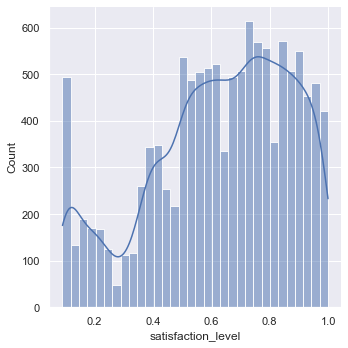

In [29]:
sns.displot(df['satisfaction_level'],kde=True);

In [30]:
df['satisfaction_level'].fillna(df['satisfaction_level'].mean(),inplace=True)

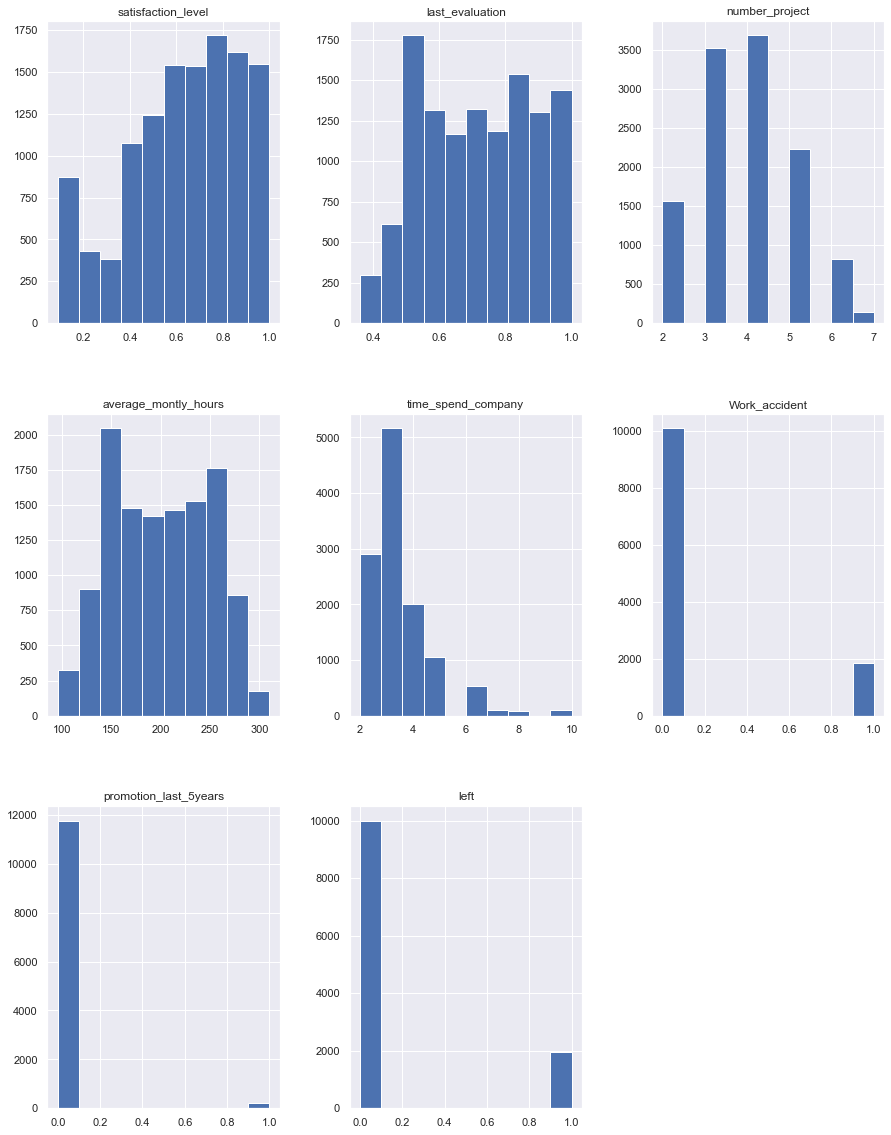

In [31]:
df.hist(figsize = (15,20))
plt.show()

In [32]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
salary                   0
left                     0
dtype: int64

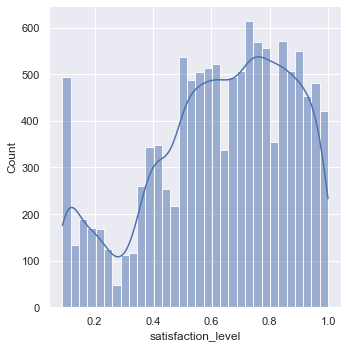

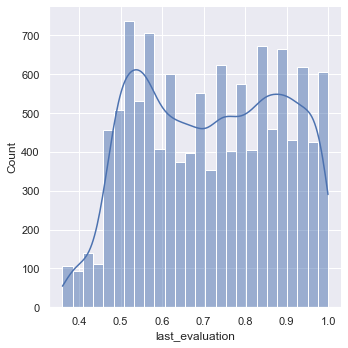

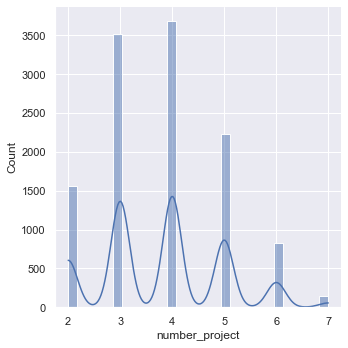

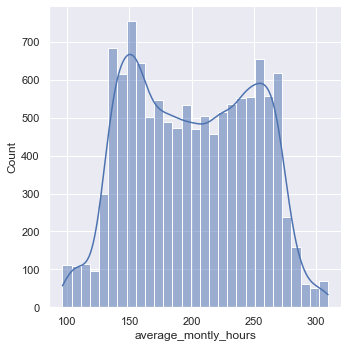

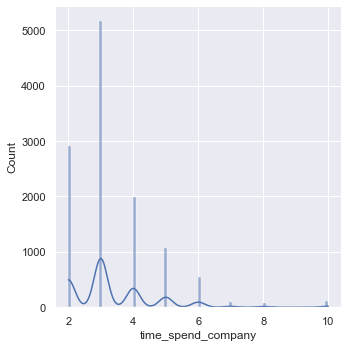

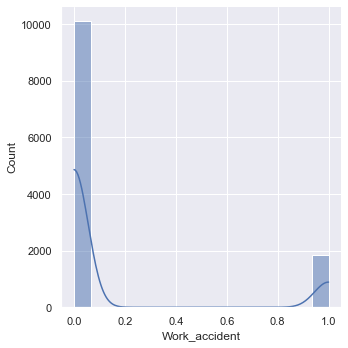

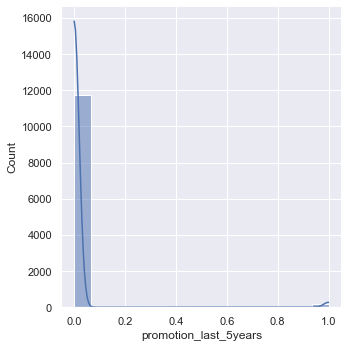

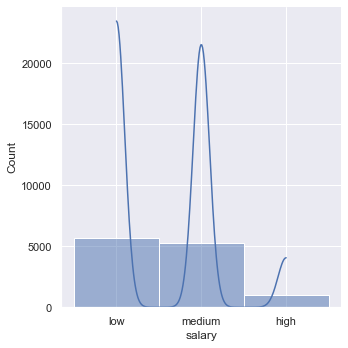

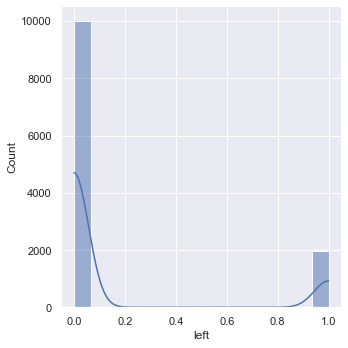

In [33]:
for col in df.columns:
    sns.displot(df[col],kde=True)

In [40]:
df.corr()['left']

satisfaction_level      -0.346894
last_evaluation          0.017609
number_project           0.035019
average_montly_hours     0.073657
time_spend_company       0.174730
Work_accident           -0.123917
promotion_last_5years   -0.044220
left                     1.000000
Name: left, dtype: float64

<AxesSubplot:xlabel='left', ylabel='Density'>

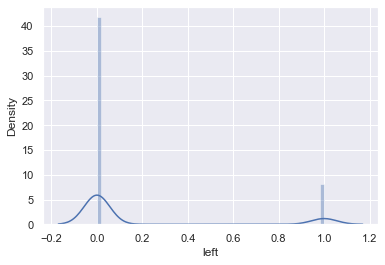

In [41]:
sns.distplot(df['left'])

<AxesSubplot:xlabel='left', ylabel='count'>

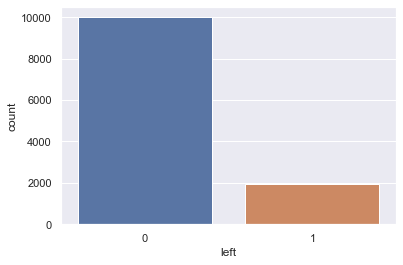

In [42]:
sns.countplot(x='left',data=df)

In [43]:
#take-away : it's clear cut of imbalance data

<AxesSubplot:xlabel='salary', ylabel='count'>

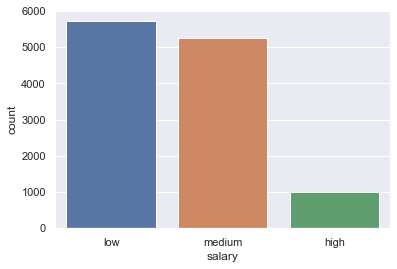

In [44]:
sns.countplot(x='salary',data=df)

In [45]:
df.head(1)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,0.38,0.53,2,157,3,0,0,low,1


In [46]:
df['number_project'].value_counts()

4    3684
3    3520
5    2232
2    1560
6     822
7     143
Name: number_project, dtype: int64

In [47]:
df[(df['number_project']==6) & (df['left']==0)]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
2008,0.50,0.75,6,127,3,0,0,low,0
2017,0.41,0.84,6,191,6,0,0,medium,0
2025,0.84,0.43,6,246,4,0,0,medium,0
2036,0.19,0.53,6,191,4,0,0,low,0
2043,0.33,0.88,6,260,3,0,0,low,0
...,...,...,...,...,...,...,...,...,...
11890,0.39,0.75,6,185,3,0,1,high,0
11905,0.21,0.85,6,285,7,0,0,medium,0
11926,0.78,0.53,6,168,3,0,0,low,0
11930,0.97,0.92,6,137,8,1,0,low,0


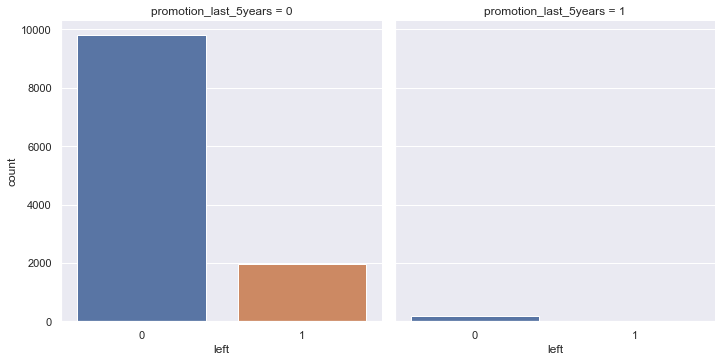

In [48]:
sns.catplot(x='left',col='promotion_last_5years',kind='count',data=df)

<Figure size 1800x648 with 0 Axes>

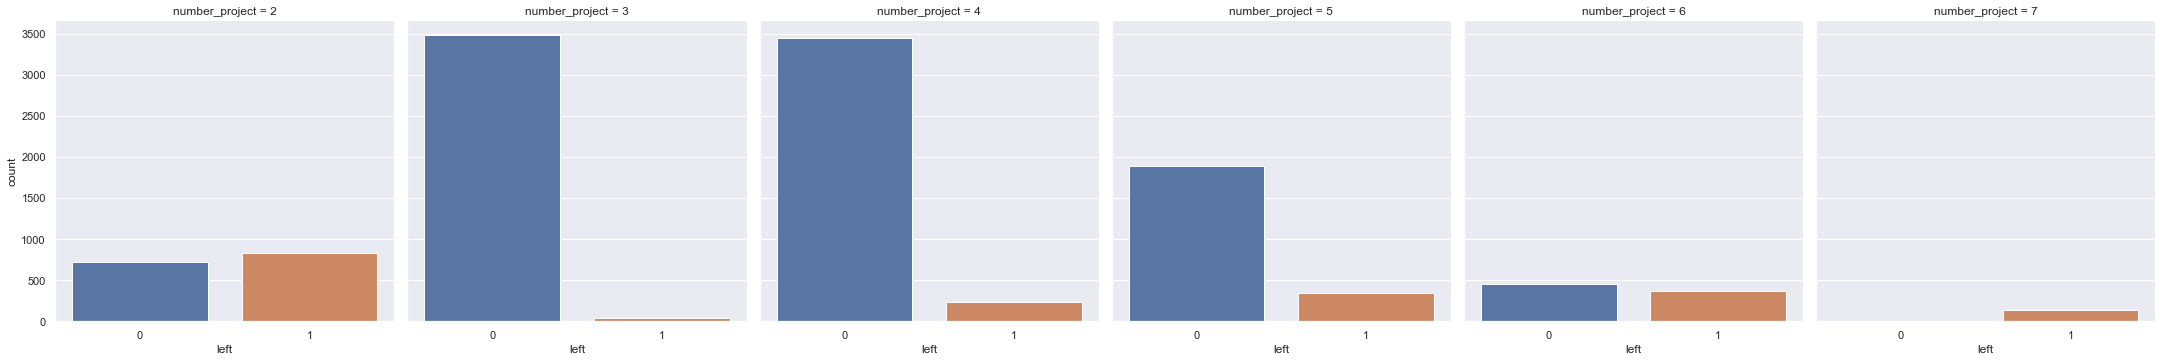

In [49]:
plt.figure(figsize=(25,9))
sns.catplot(x='left',col='number_project',kind='count',data=df)

<Figure size 1800x648 with 0 Axes>

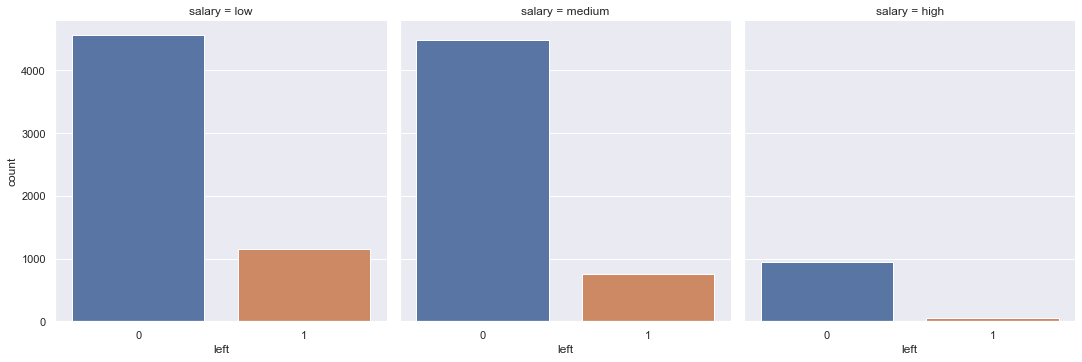

In [50]:
plt.figure(figsize=(25,9))
sns.catplot(x='left',col='salary',kind='count',data=df)

<AxesSubplot:xlabel='left', ylabel='satisfaction_level'>

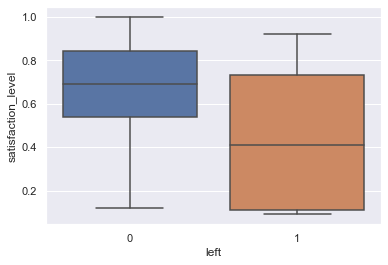

In [51]:
sns.boxplot(x='left',y='satisfaction_level',data=df)

<AxesSubplot:xlabel='satisfaction_level', ylabel='Density'>

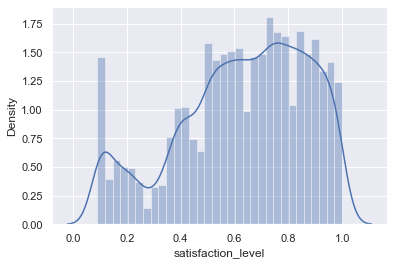

In [52]:
sns.distplot(df['satisfaction_level'])

<AxesSubplot:xlabel='average_montly_hours', ylabel='Density'>

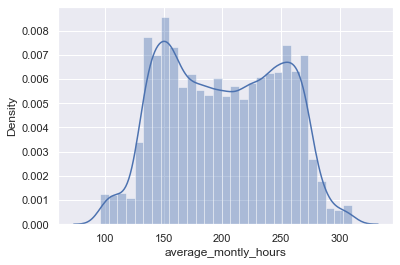

In [53]:
sns.distplot(df['average_montly_hours'])

<AxesSubplot:xlabel='time_spend_company', ylabel='Density'>

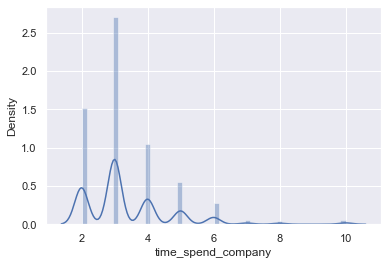

In [54]:
sns.distplot(df['time_spend_company'])

<AxesSubplot:>

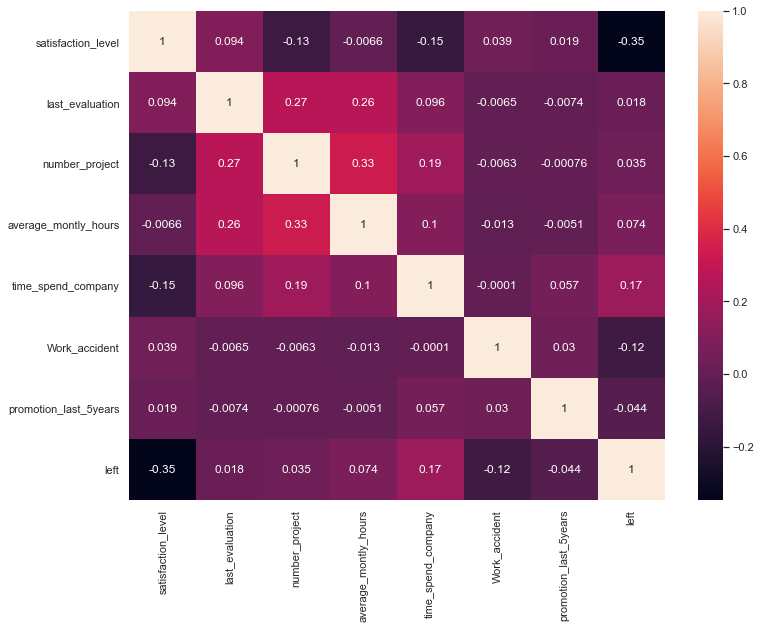

In [55]:
plt.figure(figsize=(12,9))
sns.heatmap(df.corr(),annot=True)

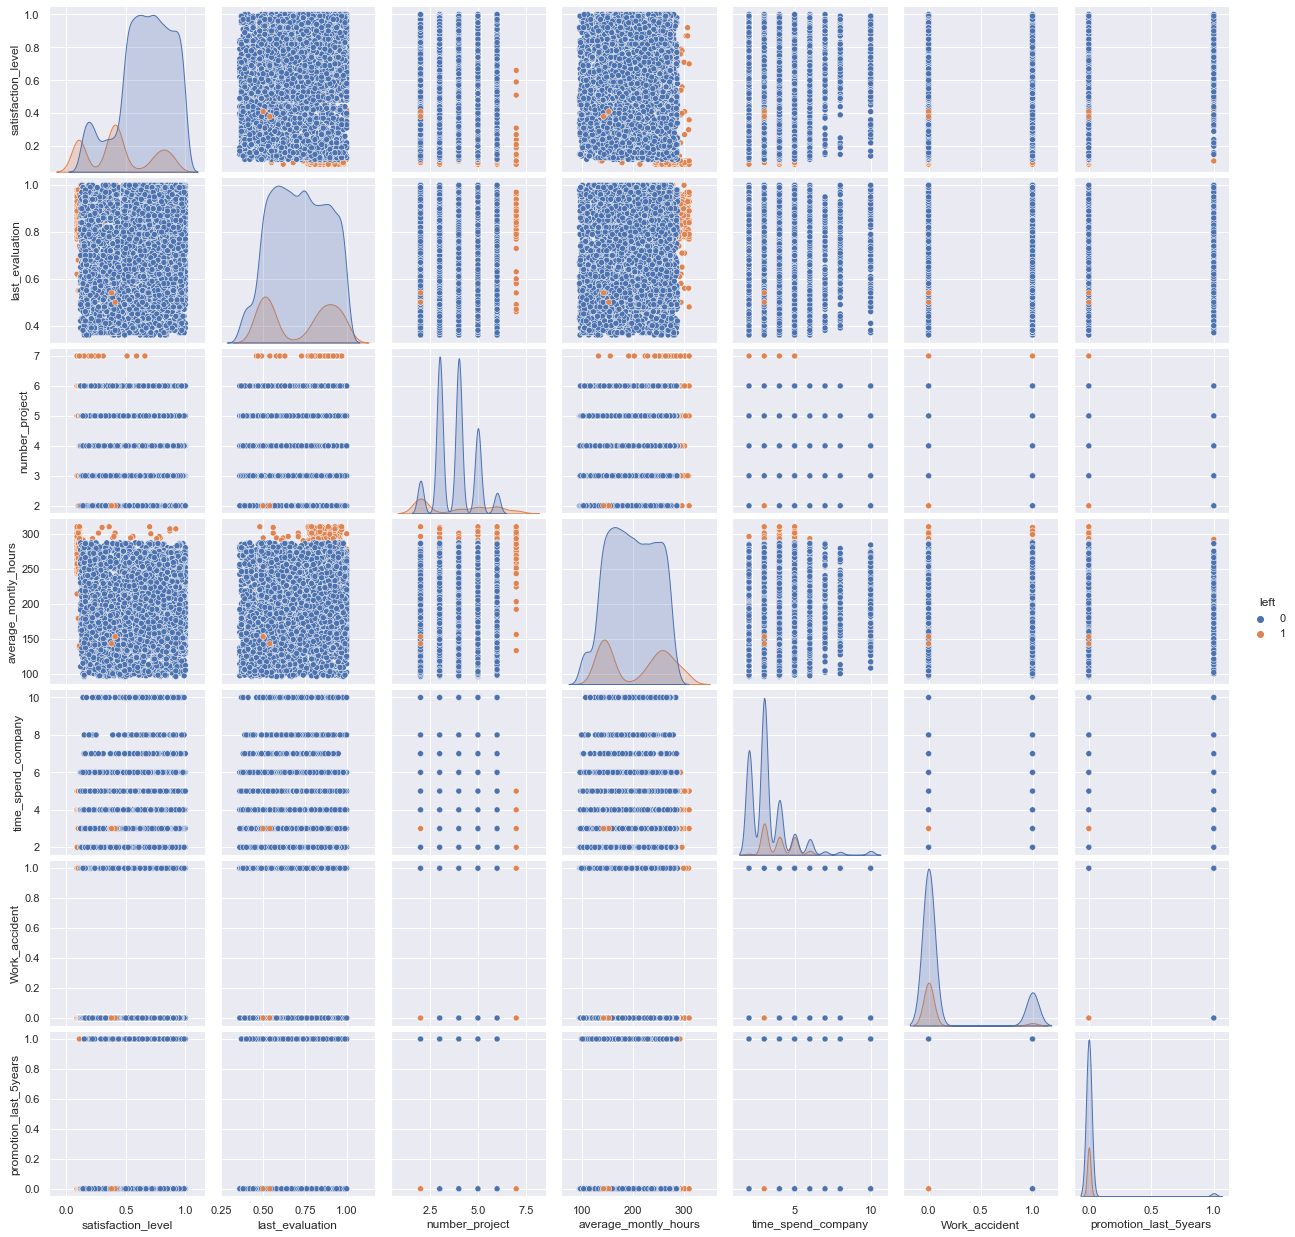

In [56]:
sns.pairplot(df,hue='left')

<AxesSubplot:xlabel='satisfaction_level', ylabel='Density'>

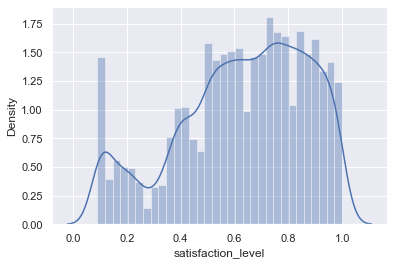

In [57]:
sns.distplot(df['satisfaction_level'])

In [58]:
df.skew()

satisfaction_level      -0.543120
last_evaluation         -0.033873
number_project           0.331274
average_montly_hours     0.023776
time_spend_company       1.814748
Work_accident            1.910311
promotion_last_5years    7.480139
left                     1.814766
dtype: float64

<AxesSubplot:>

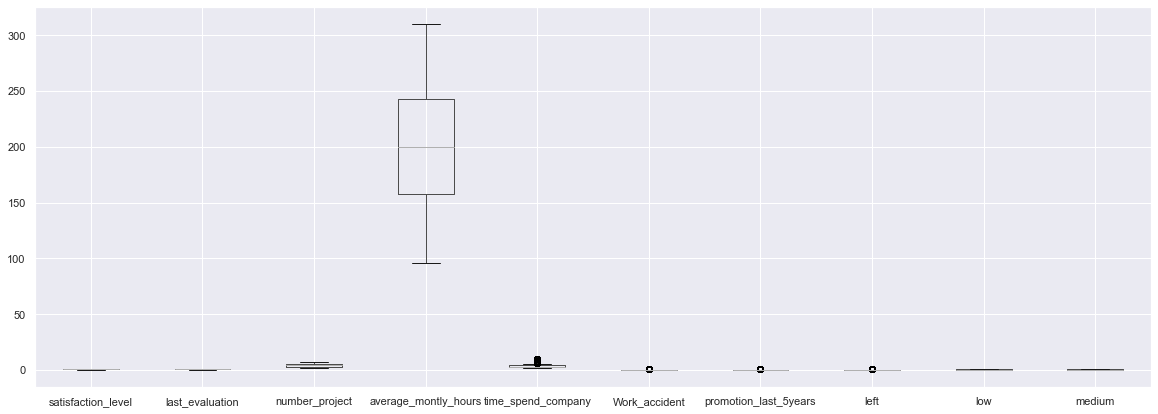

In [77]:
plt.figure(figsize=(20,7))
df.boxplot()

In [59]:
df['salary'].value_counts()

low       5720
medium    5251
high       990
Name: salary, dtype: int64

In [60]:
Salary=pd.get_dummies(df['salary'],drop_first=True)

In [61]:
Salary

,low,medium
0,1,0
1,0,1
2,0,1
3,1,0
4,1,0
...,...,...
11997,0,0
11998,0,0
11999,1,0
12005,1,0


In [62]:
df=pd.concat([df,Salary],axis=1)

In [63]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left,low,medium
0,0.38,0.53,2,157,3,0,0,low,1,1,0
1,0.80,0.86,5,262,6,0,0,medium,1,0,1
2,0.11,0.88,7,272,4,0,0,medium,1,0,1
3,0.72,0.87,5,223,5,0,0,low,1,1,0
4,0.37,0.52,2,159,3,0,0,low,1,1,0


In [64]:
df.drop(columns='salary',inplace=True)

In [65]:
df.head(1)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left,low,medium
0,0.38,0.53,2,157,3,0,0,1,1,0


In [112]:
#Train Test Split

In [66]:
X=df.drop(columns='left',axis='columns')

In [67]:
X

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,low,medium
0,0.38,0.53,2,157,3,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,1
3,0.72,0.87,5,223,5,0,0,1,0
4,0.37,0.52,2,159,3,0,0,1,0
...,...,...,...,...,...,...,...,...,...
11997,0.85,0.54,3,185,10,0,1,0,0
11998,0.33,0.65,3,172,10,0,1,0,0
11999,0.50,0.73,4,180,3,0,0,1,0
12005,0.41,0.50,2,153,3,0,0,1,0


In [68]:
cols_scale=X[['number_project','average_montly_hours','time_spend_company']]

In [69]:
scaler=StandardScaler()

In [71]:
X_trans=scaler.fit_transform(cols_scale)

In [72]:
X[['number_project','average_montly_hours','time_spend_company']]=X_trans

In [73]:
X

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,low,medium
0,0.38,0.53,-1.555052,-0.894198,-0.274259,0,0,1,0
1,0.80,0.86,1.029834,1.262542,1.978770,0,0,0,1
2,0.11,0.88,2.753092,1.467946,0.476751,0,0,0,1
3,0.72,0.87,1.029834,0.461467,1.227760,0,0,1,0
4,0.37,0.52,-1.555052,-0.853117,-0.274259,0,0,1,0
...,...,...,...,...,...,...,...,...,...
11997,0.85,0.54,-0.693424,-0.319067,4.982809,0,1,0,0
11998,0.33,0.65,-0.693424,-0.586092,4.982809,0,1,0,0
11999,0.50,0.73,0.168205,-0.421769,-0.274259,0,0,1,0
12005,0.41,0.50,-1.555052,-0.976359,-0.274259,0,0,1,0


In [78]:
y=df['left']

In [79]:
y

0        1
1        1
2        1
3        1
4        1
        ..
11997    0
11998    0
11999    0
12005    1
12015    1
Name: left, Length: 11961, dtype: int64

In [80]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [81]:
# Model selection

In [82]:
#DecisionTreeClassifier

In [83]:
clf1_dec=DecisionTreeClassifier()

In [84]:
clf1_dec.fit(X_train,y_train)

DecisionTreeClassifier()

In [85]:
#Evaluation On training Data

In [86]:
y_pred_train=clf1_dec.predict(X_train)

In [87]:
accuracy_score(y_train,y_pred_train)

1.0

In [ ]:
#Evaluation On test Data

In [88]:
y_pred_test=clf1_dec.predict(X_test)

In [89]:
accuracy_score(y_test,y_pred_test)

0.9711659005432511

In [90]:
#RandomForestClassifier

In [91]:
clf2_ran=RandomForestClassifier()

In [92]:
clf2_ran.fit(X_train,y_train)

RandomForestClassifier()

In [93]:
#Evaluation On training Data

In [94]:
y_pred_train=clf2_ran.predict(X_train)

In [95]:
accuracy_score(y_train,y_pred_train)

0.9998954849498328

In [96]:
#Evaluation On testing Data

In [97]:
y_pred_test=clf2_ran.predict(X_test)

In [98]:
accuracy_score(y_test,y_pred_test)

0.985374007521939

In [99]:
#XGBClassifier

In [100]:
clf3_xgb=XGBClassifier()

In [101]:
clf3_xgb.fit(X_train,y_train)

[19:04:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [102]:
#Evaluation On training Data

In [103]:
y_pred_train=clf3_xgb.predict(X_train)

In [104]:
accuracy_score(y_train,y_pred_train)

0.9954013377926422

In [105]:
#Evaluation On testing Data

In [106]:
y_pred_test=clf3_xgb.predict(X_test)

In [107]:
accuracy_score(y_test,y_pred_test)

0.9841203510238195

In [150]:
#So we will select Random forest becoz it has highest accuracy
# Letus create confusion matrix 

In [108]:
cm=confusion_matrix(y_test,clf2_ran.predict(X_test))
cm

array([[2014,    8],
       [  27,  344]], dtype=int64)

Text(30.5, 0.5, 'Actual_values')

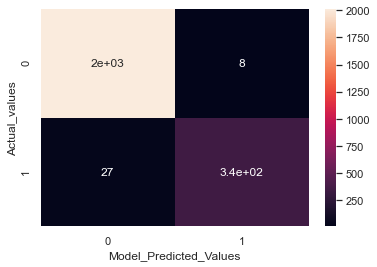

In [109]:
sns.heatmap(cm,annot=True)
plt.xlabel('Model_Predicted_Values')
plt.ylabel('Actual_values')